In [2]:
import os

# Project structure
folders = [
    "Heart_Disease_Project/data",
    "Heart_Disease_Project/notebooks",
    "Heart_Disease_Project/models",
    "Heart_Disease_Project/ui",
    "Heart_Disease_Project/deployment",
    "Heart_Disease_Project/results"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("✅ Project folders created successfully")


✅ Project folders created successfully


In [3]:
from google.colab import files

uploaded = files.upload()


Saving heart disease.zip to heart disease.zip


In [4]:
import zipfile

with zipfile.ZipFile("heart disease.zip", "r") as zip_ref:
    zip_ref.extractall("Heart_Disease_Project/data")

print("✅ Files extracted successfully!")

✅ Files extracted successfully!


#exploring the data

In [5]:
os.listdir("Heart_Disease_Project/data")

['switzerland.data',
 'Index',
 'cleve.mod',
 'WARNING',
 'processed.hungarian.data',
 'processed.cleveland.data',
 'new.data',
 'cleveland.data',
 'ask-detrano',
 'costs',
 'heart-disease.names',
 'processed.switzerland.data',
 'reprocessed.hungarian.data',
 'hungarian.data',
 'bak',
 'processed.va.data',
 'long-beach-va.data']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Column names from UCI documentation
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]


In [6]:
df = pd.read_csv(
    "Heart_Disease_Project/data/processed.cleveland.data",
    names=columns,
    na_values="?"
)

print("Shape:", df.shape)

Shape: (303, 14)


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
298,False
299,False
300,False
301,False


In [13]:
num_cols = df.select_dtypes(include=[np.number]).columns

outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outliers[col] = outlier_count

outliers

{'age': np.int64(0),
 'sex': np.int64(0),
 'cp': np.int64(23),
 'trestbps': np.int64(9),
 'chol': np.int64(5),
 'fbs': np.int64(45),
 'restecg': np.int64(0),
 'thalach': np.int64(1),
 'exang': np.int64(0),
 'oldpeak': np.int64(5),
 'slope': np.int64(0),
 'ca': np.int64(20),
 'thal': np.int64(0),
 'target': np.int64(0)}

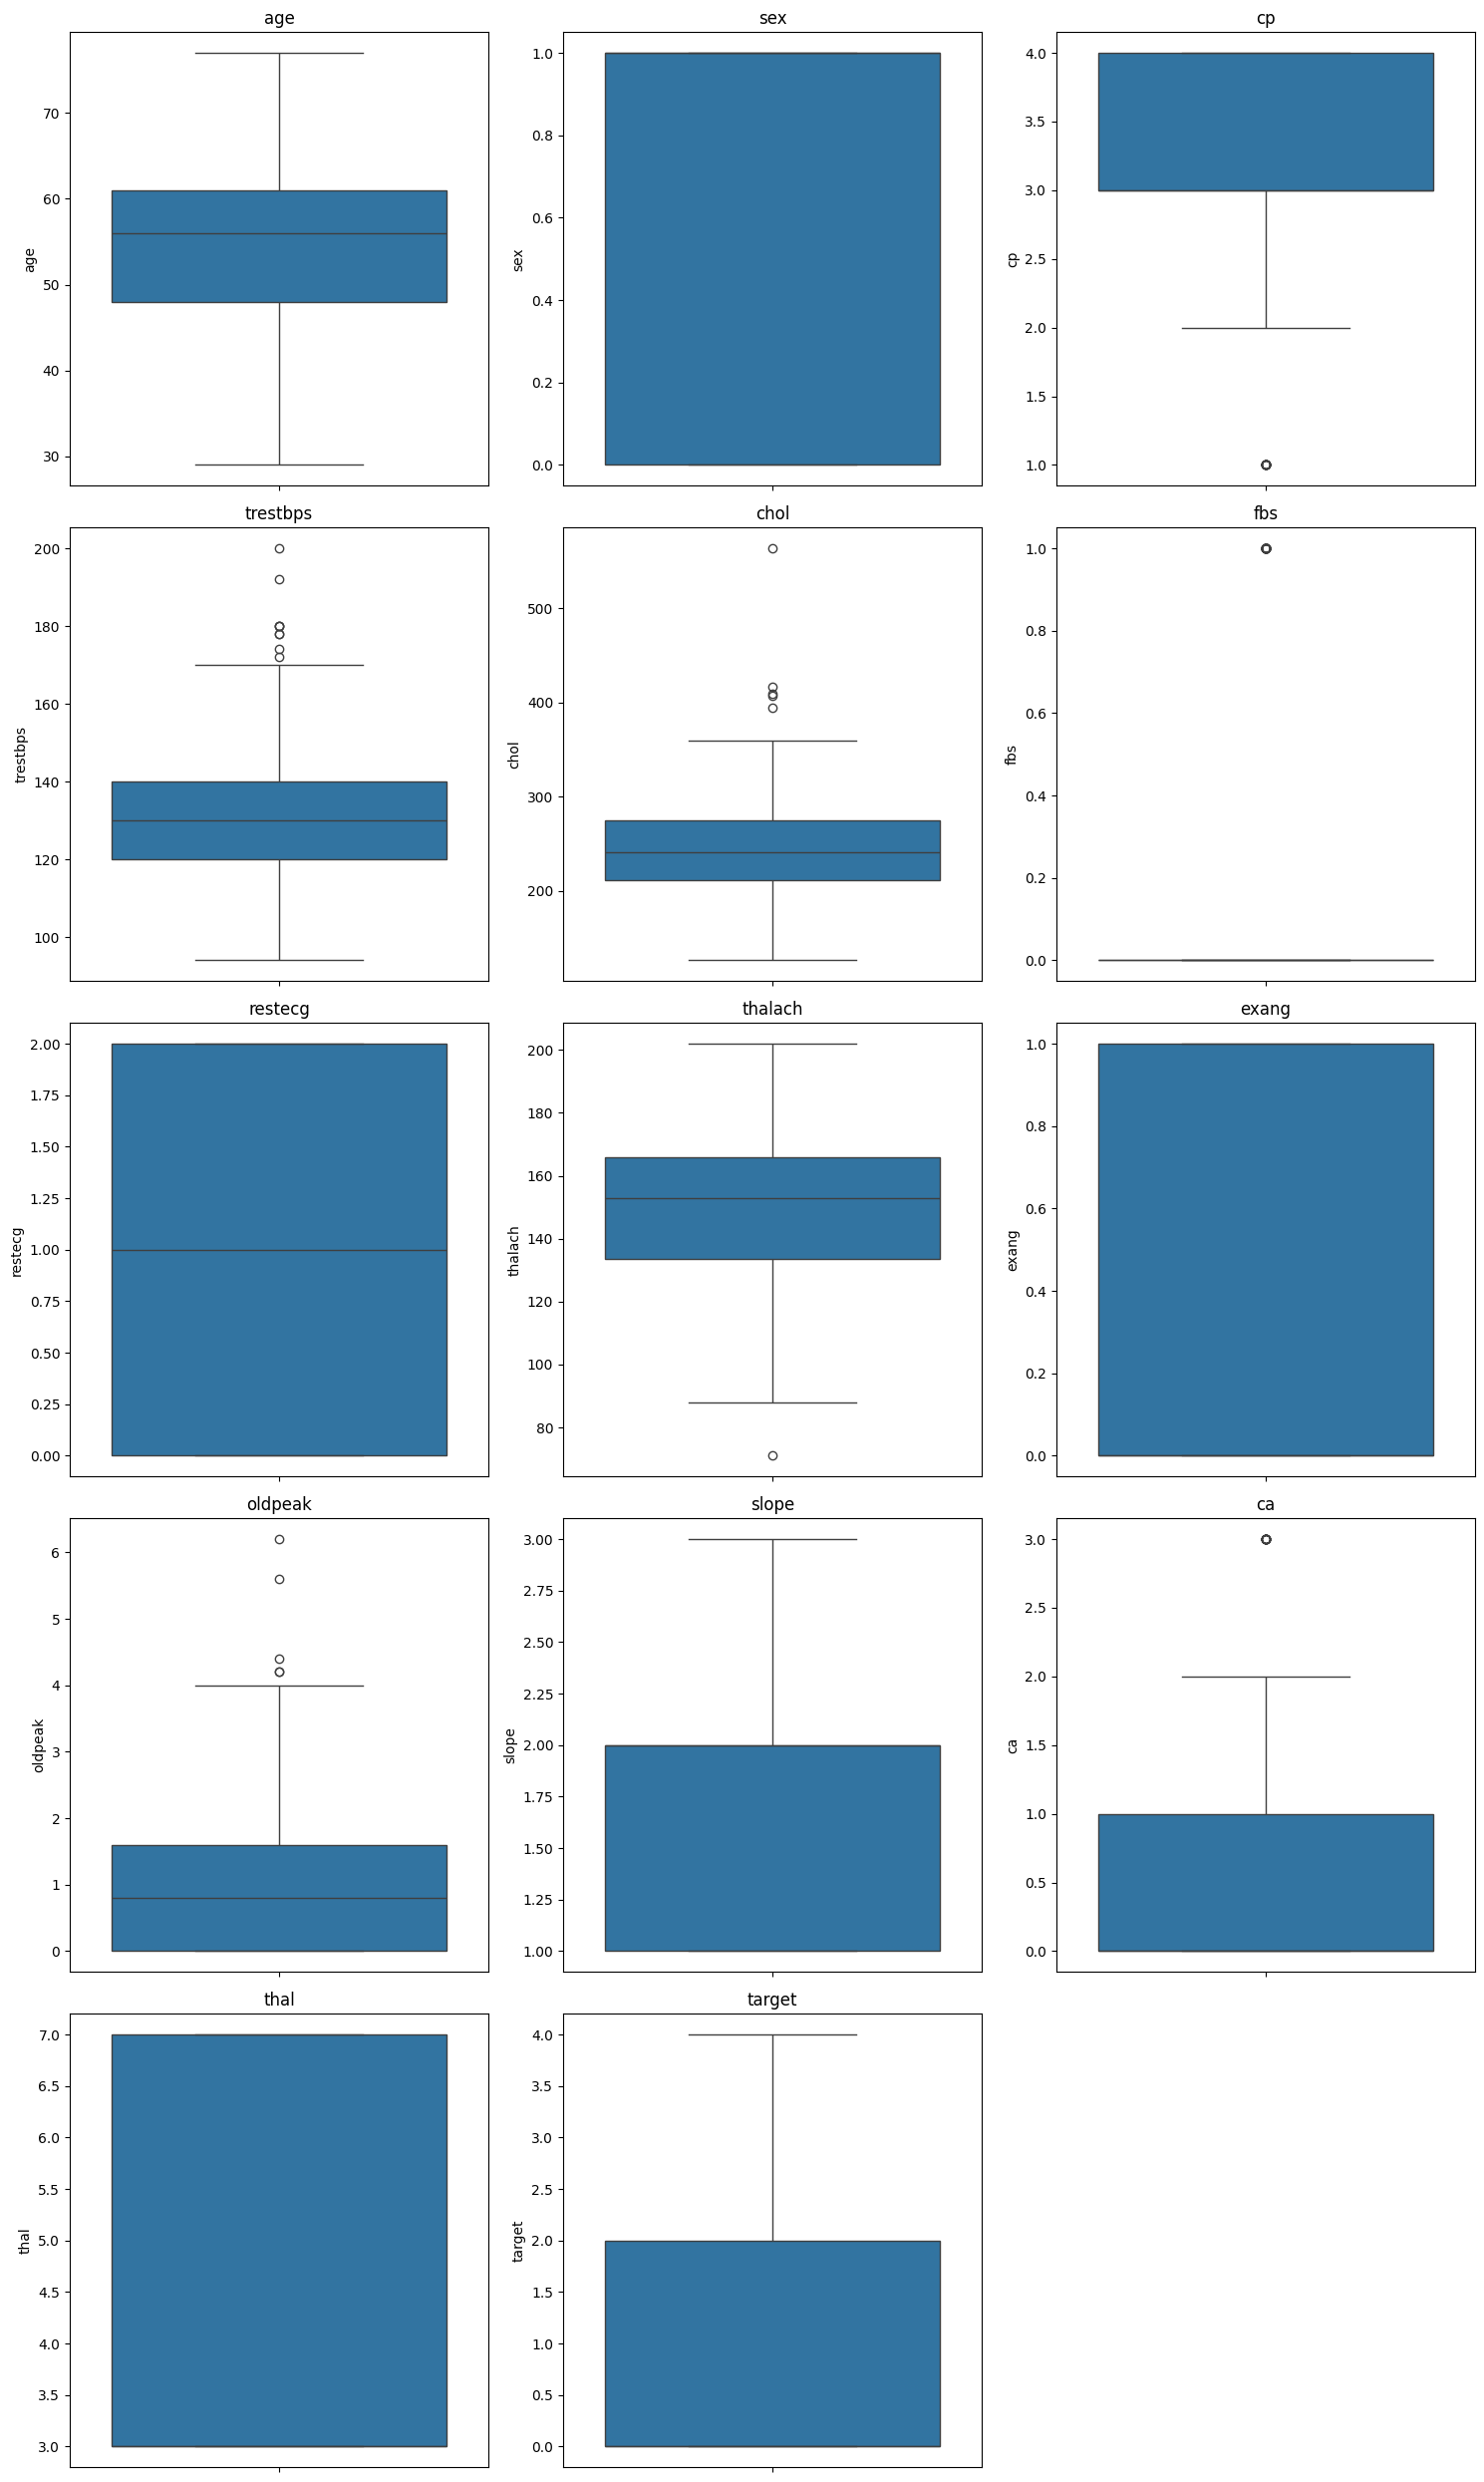

In [16]:
import math
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = df.select_dtypes(include=[np.number]).columns

# Calculate rows & cols for subplots
n_features = len(num_cols)
n_cols = 3  # number of plots per row
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#Data Preprocessing & Cleaning



In [17]:
df = df.dropna()
print("After dropping missing values:", df.shape)

After dropping missing values: (297, 14)


In [18]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

In [19]:
categorical_cols = ["cp", "restecg", "slope", "thal"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})


In [20]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Final dataset shape:", df_encoded.shape)

Final dataset shape: (297, 19)


In [21]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0.0,0,0,0,0,0,1,0,1,1,0
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,3.0,1,0,0,1,0,1,1,0,0,0
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,2.0,1,0,0,1,0,1,1,0,0,1
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0.0,0,0,1,0,0,0,0,1,0,0
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0.0,0,1,0,0,0,1,0,0,0,0


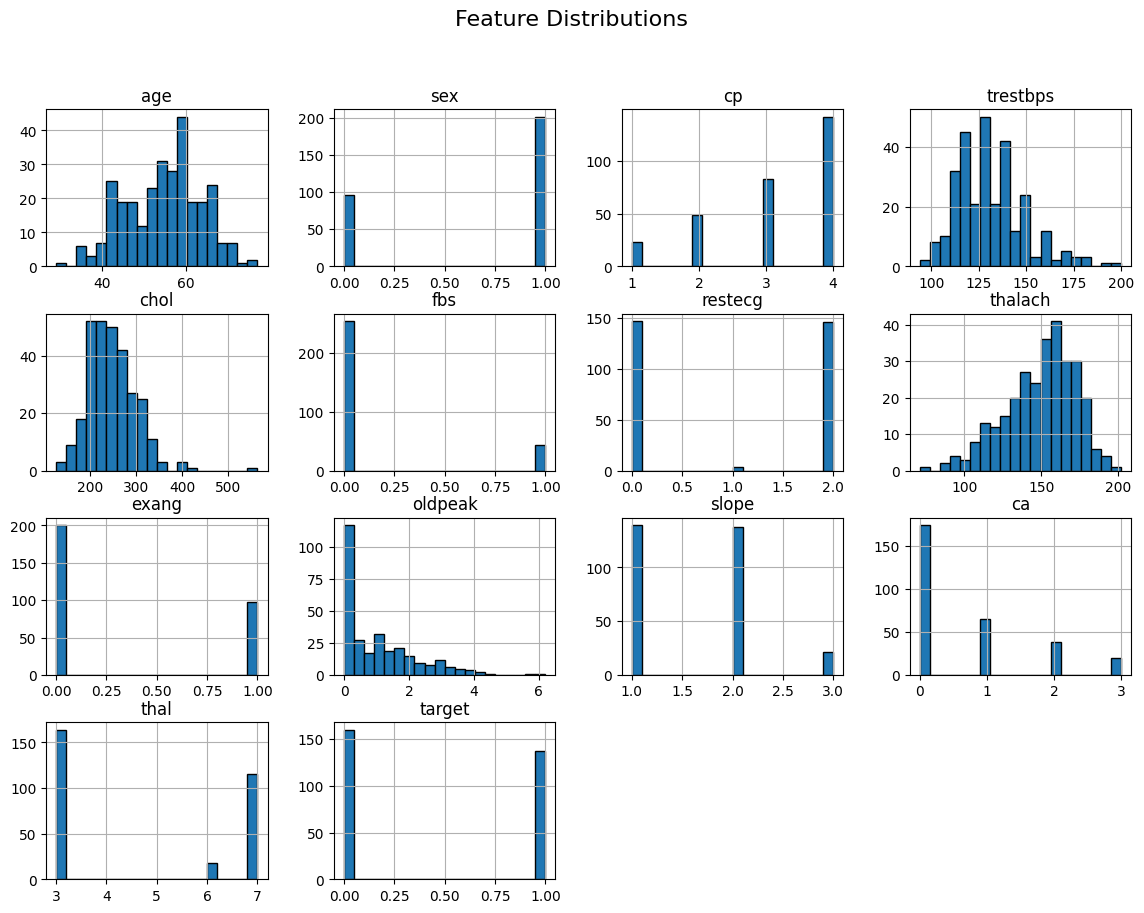

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms
df.hist(figsize=(14, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

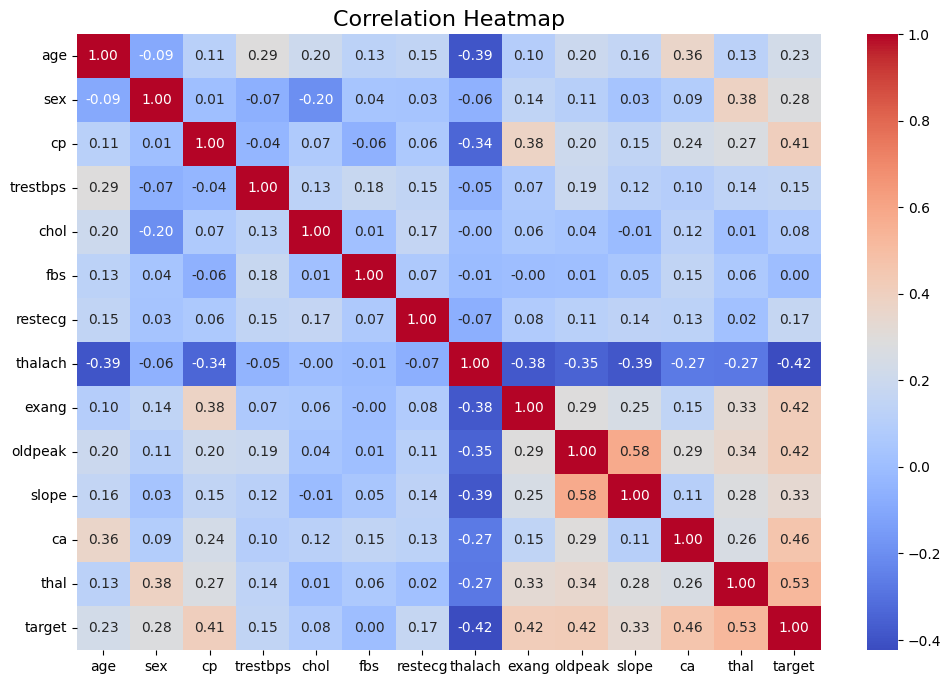

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

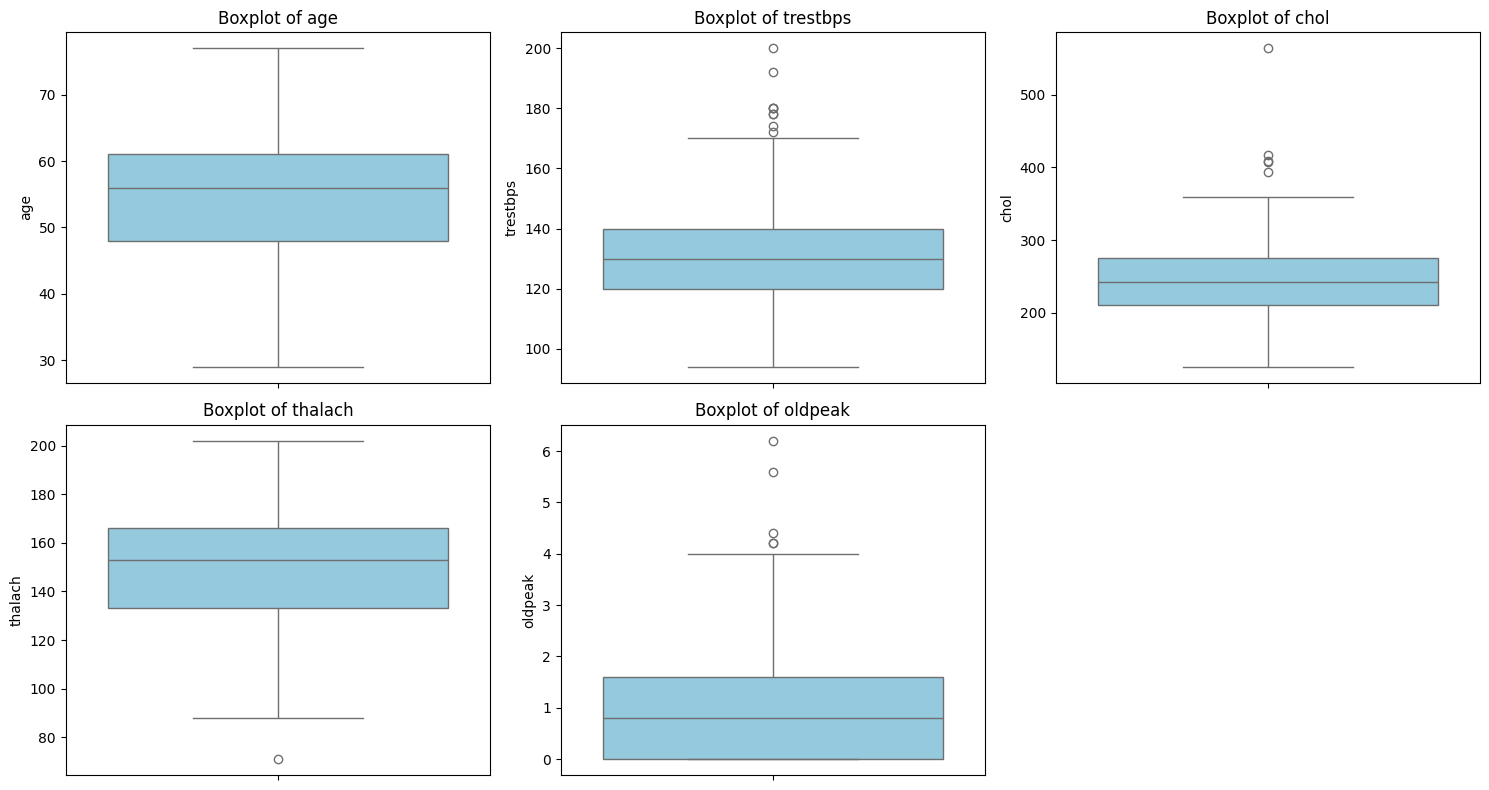

In [24]:
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [25]:
output_path = "Heart_Disease_Project/data/heart_disease_cleaned.csv"
df_encoded.to_csv(output_path, index=False)

print(f"\n✅ Cleaned dataset saved to '{output_path}'")



✅ Cleaned dataset saved to 'Heart_Disease_Project/data/heart_disease_cleaned.csv'


In [26]:
df_clean = pd.read_csv(output_path)
print("Reloaded Shape:", df_clean.shape)
display(df_clean.head())

Reloaded Shape: (297, 19)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0.0,0,0,0,0,0,1,0,1,1,0
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,3.0,1,0,0,1,0,1,1,0,0,0
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,2.0,1,0,0,1,0,1,1,0,0,1
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0.0,0,0,1,0,0,0,0,1,0,0
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0.0,0,1,0,0,0,1,0,0,0,0
